In [96]:
## Atoyebi Paul Assignment 

In [97]:
## Data Preprocessing

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [99]:
## Read the data 
df = pd.read_csv(r"C:\Users\PAUL\Desktop\dataset\Churn_Modelling.csv")

In [100]:
df.shape

(10000, 14)

In [101]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [102]:
# Total Duplicated Values
df.duplicated().sum()

np.int64(0)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [104]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

In [105]:
## Grouping dataframe into numerical & Categorical 

cat_col = [col for col in df.columns if df[col].dtype == "object"]
num_col = [col for col in df.columns if df[col].dtype != "object"]

print("Categorial Columns", cat_col)
print("Numerical Columns", num_col)

Categorial Columns ['Surname', 'Geography', 'Gender']
Numerical Columns ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Churn']


In [106]:
# Categorial Duplicated Values 
df[cat_col].nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [107]:
# Numerical Duplicated Values
df[num_col].nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Churn                  2
dtype: int64

In [108]:
# For missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

In [109]:
## Droppin some colums I wont need 
df = df.drop(columns= ["RowNumber", "CustomerId", "Surname"])

In [110]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [111]:
## Label Encoding 
from sklearn.preprocessing import LabelEncoder

In [112]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [113]:
## Encode Male as 1 and Female as 0
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [114]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [115]:
## To know values to be encoded

df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [116]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


In [117]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [118]:
X = df.drop('Churn', axis=1) 

In [119]:
y = df['Churn']

In [120]:
## Splitting data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [121]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [122]:
X_train_scaled

array([[ 1.058568  ,  0.90750738,  1.71508648, ...,  1.04208392,
        -0.57831252, -0.57773517],
       [ 0.91362605,  0.90750738, -0.65993547, ..., -0.62355635,
         1.72916886, -0.57773517],
       [ 1.07927399, -1.10191942, -0.18493108, ...,  0.30812779,
         1.72916886, -0.57773517],
       ...,
       [ 0.16821031, -1.10191942, -0.18493108, ..., -0.55808767,
        -0.57831252, -0.57773517],
       [ 0.37527024,  0.90750738, -0.37493284, ..., -1.35149956,
        -0.57831252,  1.73089688],
       [ 1.56586482,  0.90750738,  1.14508121, ..., -1.02692216,
        -0.57831252,  1.73089688]])

In [123]:
X_test_scaled

array([[-0.68073539,  0.90750738, -0.27993196, ..., -0.09502138,
        -0.57831252, -0.57773517],
       [-1.30191518,  0.90750738, -0.5649346 , ..., -0.778941  ,
         1.72916886, -0.57773517],
       [-0.97061929, -1.10191942,  0.10007155, ...,  0.09946914,
        -0.57831252,  1.73089688],
       ...,
       [-1.39509214, -1.10191942,  0.7650777 , ...,  0.8700859 ,
         1.72916886, -0.57773517],
       [ 0.39597623,  0.90750738,  0.00507067, ..., -1.47935555,
        -0.57831252, -0.57773517],
       [ 1.02750901,  0.90750738, -0.5649346 , ..., -0.49531855,
        -0.57831252, -0.57773517]])

In [124]:
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)

Churn
0    0.7965
1    0.2035
Name: proportion, dtype: float64

In [125]:
## Logistic Regression 

In [126]:
## Training the model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [127]:
## Make predictions
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

In [128]:
## Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[1540,   53],
       [ 331,   76]])

In [129]:
## Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [130]:
## ROC–AUC Score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)

np.float64(0.7747778595236223)

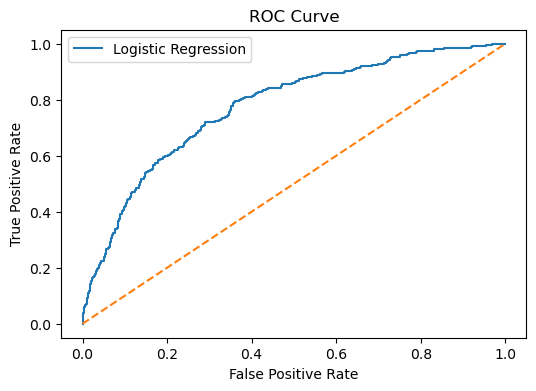

In [131]:
#### ROC–AUC Score curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [132]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
2,Age,0.738847
9,Geography_Germany,0.356679
4,Balance,0.160622
8,EstimatedSalary,0.047725
10,Geography_Spain,0.018907
3,Tenure,-0.020071
6,HasCrCard,-0.032208
5,NumOfProducts,-0.070292
0,CreditScore,-0.085986
1,Gender,-0.260851


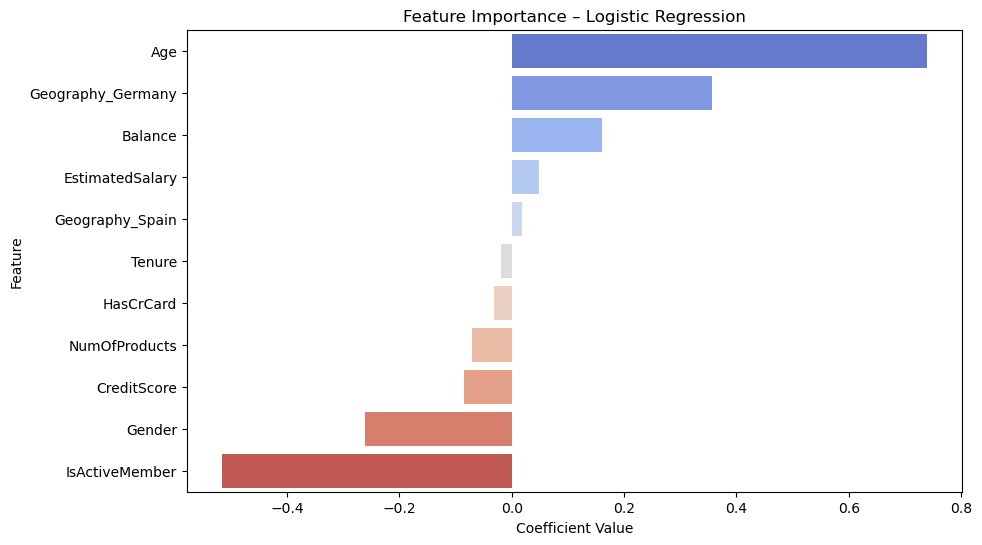

In [133]:
## This plot show the Feature importance to the Churn Rate

import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coef_df, 
    palette='coolwarm'
)
plt.title('Feature Importance – Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [134]:
"""
Model Interpretation Summary:
The results show that age, balance, and geographic location are strong positive
drivers of churn, while active membership, gender (male), and number of products
reduce churn probability. Both demographic and behavioral features jointly
influence customer churn and inform targeted retention strategies.
"""


'\nModel Interpretation Summary:\nThe results show that age, balance, and geographic location are strong positive\ndrivers of churn, while active membership, gender (male), and number of products\nreduce churn probability. Both demographic and behavioral features jointly\ninfluence customer churn and inform targeted retention strategies.\n'

In [135]:
# Train
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [136]:
# Predict
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

In [137]:
# Evaluate
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000

ROC-AUC: 0.59848754764009


In [141]:
"""
The Decision Tree model achieved high overall accuracy but failed to identify churn cases, resulting in zero recall for churners and a low ROC-AUC score.
"""

'\nThe Decision Tree model achieved high overall accuracy but failed to identify churn cases, resulting in zero recall for churners and a low ROC-AUC score.\n'